# Work through example together

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [17]:
import numpy as np
import tensorflow as tf

In [18]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**What's the primary difference between these two?**<br/>
The are both normal distributions but ones centered along the Y axis at \[0,3\] and the other is at \[3,0\] along the X-Axis. 
<br/><br/>

**What do we expect the data to look like?**<br/>
We know that for 2-D Multivariate distributions with no covariance 
appear as circles that grow less dense away from the centre. We think that
this would kind of be of the same form except an ellipse since, there is covariance
of magnitude 0.5. <br/><br/>

**Stacking the two classes into an array with shape (2000, 2)**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**What type of argument does 'vstack' take?**<br/>
vstack takes an n-tuple of numpy matrices as its arguments. It always stacks along axis 0.<br/>

**What shape is this?**<br/>
The old shapes were 1000x2. The new shape is 2000x2. <br/>

**What's on the 0th axis?** <br/>
The rows of the matrix are on the 0th axis. This corresponds to each sample.<br/>

**What's on the 1th axis?** <br/>
The cols of the matrix are on the 1th axis. This corresponds to the features or in our case, the dimensions.<br/>

**Generating the corresponding targets (0 and 1)**

In [43]:
targets = np.vstack((np.ones((num_samples_per_class, 1), dtype="float32"),
                     2*np.ones((num_samples_per_class, 1), dtype="float32")))


**What else are targets called?** <br/>
Targets are also called samples.<br/>

**What shape is this? Why?** <br/>
The shape of each target is 1x1. This is because each sample has 1 feature.<br/>

**Plotting the two point classes**

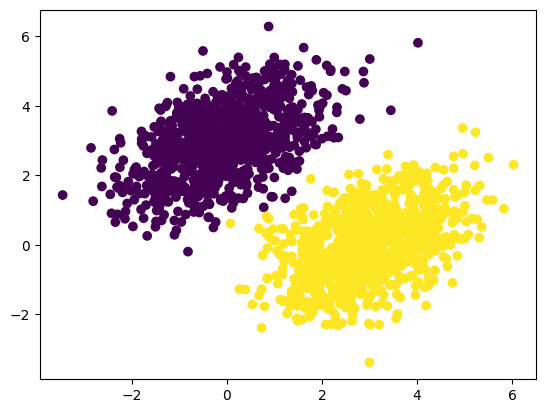

In [44]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**How did we deal with color here?** <br/>
Color was picked from the default color scheme 'viridis'. The colors were chosen based on the number of unique label values. Changing the label values does not change the colors but including a new label would have elements corresponding to the new label in new color.

**Creating the linear classifier variables**

In [67]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**Why'd we define W and b as tf.Variables?**<br/>
We want to assign and possibly mutate these variables created. Normal tensorflow objects do not support these features.

**The forward pass function**

In [68]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**What does our model actually look like as a surface above feature space?**<br/>
Our model looks like a curve constrained between 0 and 1 in the z axis.<br/>

**Does the order of the matmul parameters matter?**<br/>
The order of the matmul does matter, inputs is a tensor of dimensions (2000, 2) and W is a tensor of dimensions of (2,1). For the matrix product to be calculated, they have to be ordered.

**The mean squared error loss function**

In [69]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**What does reduce_mean do?**<br/>
reduce_mean calculates the mean of all samples along the axis specified. In this case we have 2000 sample_losses. reduce_mean calculates the mean of all of these and reports one value.<br/>

**Does the axis we reduce along matter?**<br/>
The axis we reduce along matters; in our case, per_sample_losses is a 2000x1 matrix and our implementation reduces along axis 0 creating a 1x1 value.<br/>

**There's no square root - does that change the shape of the loss surface?**<br/> 
Yes it does change the loss surface. The surface changes from a paraboloid to a pair of lines forming a v.<br/>

**Does that change the location to the maxima/minima?**<br/>
It does not change the location of the maxima/minima.<br/>

**The training step function**

In [48]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        # print(type(predictions)) # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**What does learning rate control?** <br/>
The learning controls the rate at which the gradient changes the weights and bias.<br/>

**What are the variable types of inputs, targets, and predictions?** <br/>
Inputs is a 2000x2 tensor. Targets and predictions are both 2000x1 tensors.<br/>

**Why do we care about the gradients of W and b?**<br/>
The gradients tell us how far we are from achieving the optimal value of W and b that minimizes the mean square loss.<br/>

**The batch training loop**

Loss at step 0: 1.0379
Loss at step 1: 0.6399
Loss at step 2: 0.5587
Loss at step 3: 0.5098
Loss at step 4: 0.4675
Loss at step 5: 0.4290
Loss at step 6: 0.3939
Loss at step 7: 0.3619
Loss at step 8: 0.3326
Loss at step 9: 0.3059
Loss at step 10: 0.2815
Loss at step 11: 0.2593
Loss at step 12: 0.2390
Loss at step 13: 0.2204
Loss at step 14: 0.2035
Loss at step 15: 0.1881
Loss at step 16: 0.1740
Loss at step 17: 0.1611
Loss at step 18: 0.1493
Loss at step 19: 0.1386
Loss at step 20: 0.1288
Loss at step 21: 0.1199
Loss at step 22: 0.1117
Loss at step 23: 0.1042
Loss at step 24: 0.0974
Loss at step 25: 0.0912
Loss at step 26: 0.0856
Loss at step 27: 0.0804
Loss at step 28: 0.0757
Loss at step 29: 0.0714
Loss at step 30: 0.0674
Loss at step 31: 0.0638
Loss at step 32: 0.0605
Loss at step 33: 0.0576
Loss at step 34: 0.0548
Loss at step 35: 0.0523
Loss at step 36: 0.0500
Loss at step 37: 0.0480
Loss at step 38: 0.0461
Loss at step 39: 0.0443


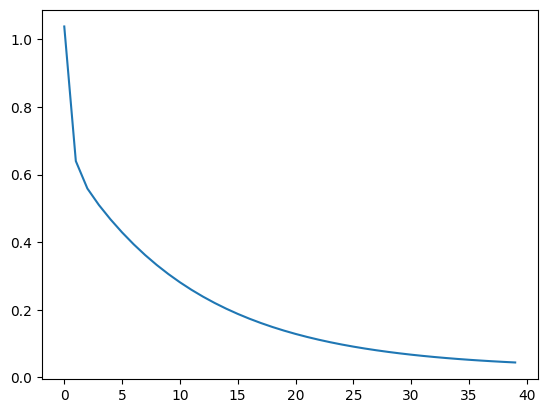

In [70]:
loss = []
for step in range(40):
    loss.append(training_step(inputs, targets))
    print(f"Loss at step {step}: {loss[step]:.4f}")

plt.plot(range(40), loss)

**What happens if we run this fewer times?**<br/>
The end loss value would be higher if we ran it fewer times. <br/>

**Try to modify this to plot the loss** <br/>
Answer shown above

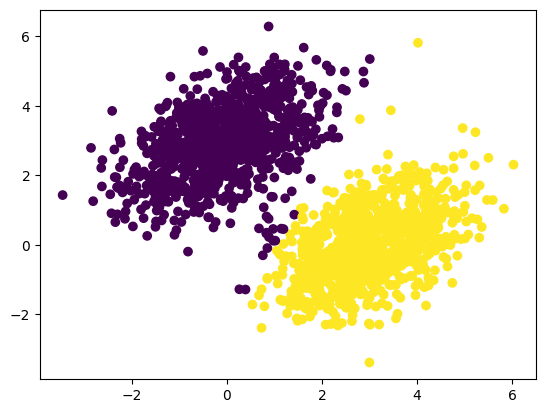

In [51]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 1.5)
plt.show()

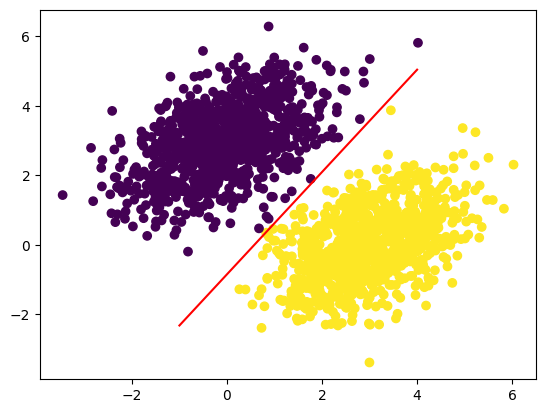

In [42]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

**How would we expect this to change if the two labels were 1 and 2 (instead of 0 and 1)?** <br/>
We wouldnt expect the data to change by much, but we would have to change a few arguments in the plot function, mainly $cmap =predictions[:,0] > 0.5$ to $> 1.5$ since the new range of values is $[1,2]$<br/>

**Color the entire regions of each class in the square (so not just the input data points).  Hint (np.meshgrid()) ** <br/>

**Try changing the model to include 2nd degree terms (e.g. W0*x + W1*y + W2*x**2 + W3*y**2 + b). ** <br/>